In [53]:
#libraries 
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split,GridSearchCV

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import classification_report, accuracy_score, f1_score

from tabulate import tabulate

In [54]:
student_df = pd.read_csv('data_of_stud.csv')
student_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1    2      5        4    yes  

[5 rows x 31 columns]

In [55]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [56]:
student_df.dropna().head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1    2      5        4    yes  

[5 rows x 31 columns]

In [57]:
def missingvalues_handling(student_df):
    print("Before handling:")
    print(student_df.isnull().sum())

    student_df = student_df.fillna(student_df.median())

    print("\nAfter handling:")
    print(student_df.isnull().sum())

    return student_df

#handling missing values
student_df = missingvalues_handling(student_df)

Before handling:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

After handling:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health   

C:\Users\Hari Kiran\AppData\Local\Temp\ipykernel_11200\1069747755.py:5: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  student_df = student_df.fillna(student_df.median())


Data Pre-Processing

In [58]:
#performing one-hot encoding on my dataset
def ohe_data(df):
    columns_ohe = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
                   'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
    
    existing_columns = set(df.columns)
    columns_to_encode = [col for col in columns_ohe if col in existing_columns]

    if columns_to_encode:
        df = pd.get_dummies(df, columns=columns_to_encode)

    return df

# ohe_data(student_df)

In [59]:
ohe_data(student_df).head()

age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   18     4     4           2          2         0       4         3      4   
1   17     1     1           1          2         0       5         3      3   
2   15     1     1           1          2         3       4         3      2   
3   15     4     2           1          3         0       3         2      2   
4   16     3     3           1          2         0       4         3      2   

   Dalc  ...  activities_no  activities_yes  nursery_no nursery_yes  \
0     1  ...              1               0           0           1   
1     1  ...              1               0           1           0   
2     2  ...              1               0           0           1   
3     1  ...              0               1           0           1   
4     1  ...              1               0           0           1   

   higher_no  higher_yes  internet_no  internet_yes  romantic_no  romantic_yes  
0          0           1            1             0            1             0  
1          0           1            0             1            1             0  
2          0           1            0             1            1             0  
3          0           1            0             1            0             1  
4          0           1            1             0            1             0  

[5 rows x 57 columns]

Visualization of the Data

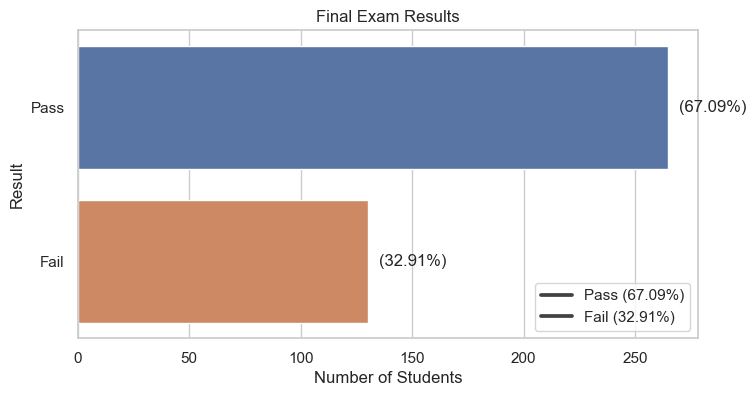

In [60]:
pf_count = student_df['passed'].value_counts()
pf_count.index = pf_count.index.map({'yes': 'Pass', 'no': 'Fail'}) #replacing the yes and no values with pass and fail to get a better understanding

total_students = len(student_df)

pass_percentage = (pf_count['Pass'] / total_students) * 100
fail_percentage = (pf_count['Fail'] / total_students) * 100

plt.figure(figsize=(8, 4))
ax = sns.barplot(x=pf_count.values, y=pf_count.index)

for i, count in enumerate(pf_count):
    ax.text(count + 5, i, f"({(count/total_students)*100:.2f}%)", va='center', fontsize=12)

plt.title('Final Exam Results')
plt.xlabel('Number of Students')
plt.ylabel('Result')
plt.legend([f'Pass ({pass_percentage:.2f}%)', f'Fail ({fail_percentage:.2f}%)'])

plt.show()

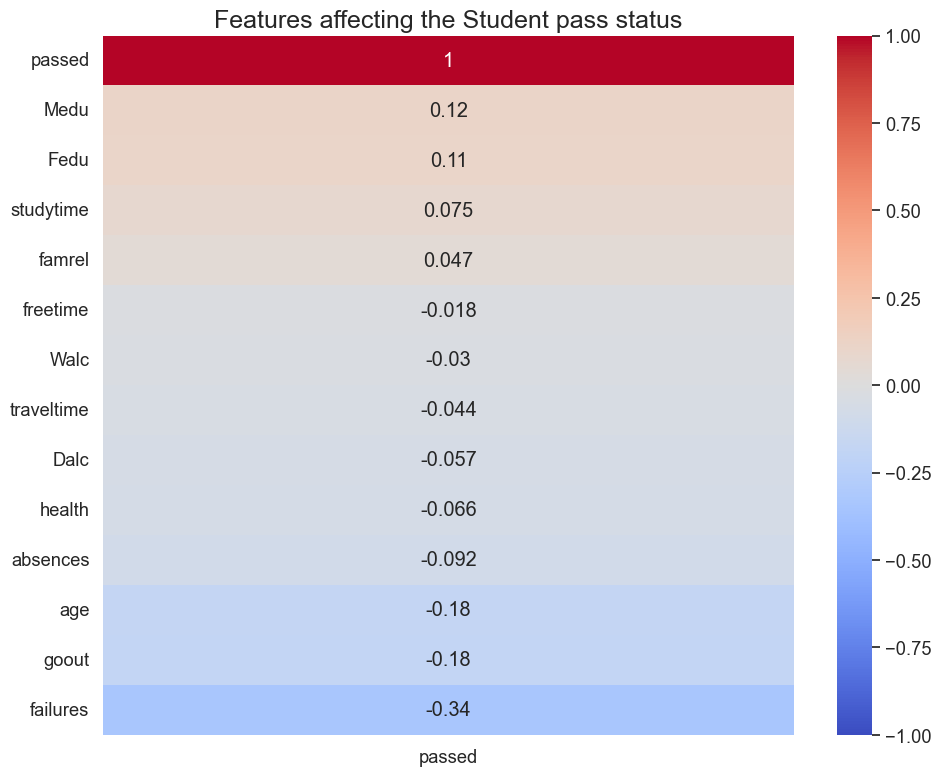

In [61]:
student_df['passed'].fillna('no', inplace=True)
student_df['passed'] = student_df['passed'].map({'yes': 1, 'no': 0})

numeric_columns = student_df.select_dtypes(include=['number']).columns

correlation_matrix = student_df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
heatmap = sns.heatmap(correlation_matrix[['passed']].sort_values(by='passed', ascending=False),
                      annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Features affecting the Student pass status', fontdict={'fontsize': 18})
plt.tight_layout()
plt.show()

In [62]:
correlation_with_passed = correlation_matrix['passed']

positive_correlations = correlation_with_passed[correlation_with_passed > 0].sort_values(ascending=False)
negative_correlations = correlation_with_passed[correlation_with_passed < 0].sort_values(ascending=True)

print("Positive Factors:")
print(positive_correlations)

print("\nNegative Factors:")
print(negative_correlations)

Positive Factors:
passed       1.000000
Medu         0.115396
Fedu         0.108057
studytime    0.074613
famrel       0.046683
Name: passed, dtype: float64

Negative Factors:
failures     -0.337731
goout        -0.183399
age          -0.179645
absences     -0.092244
health       -0.065668
Dalc         -0.057343
traveltime   -0.044446
Walc         -0.029957
freetime     -0.018321
Name: passed, dtype: float64


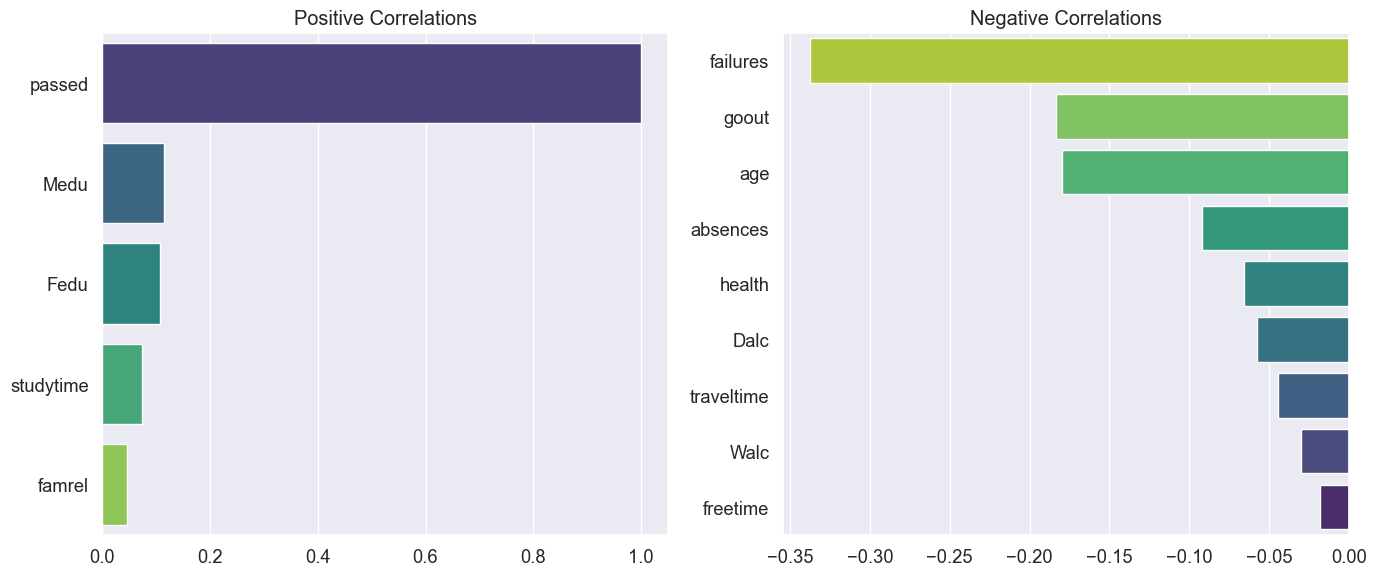

In [63]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.barplot(x=positive_correlations.values, y=positive_correlations.index, ax=axes[0], palette='viridis')
axes[0].set_title('Positive Correlations')

sns.barplot(x=negative_correlations.values, y=negative_correlations.index, ax=axes[1], palette='viridis_r')
axes[1].set_title('Negative Correlations')

plt.tight_layout()

plt.show()

The student's success is effected by the negative factors. The most (top 3) are : 
1. go out
2. age
3. absences


Also the student's success is improved by the positive factors. The top 3 are:
1. mother's education
2. father's education
3. study time

In [64]:
#one-hot encode the data
student_df = ohe_data(student_df)

X = student_df.drop('passed', axis=1)
y = student_df['passed']

Logistic Regeression

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report, auc
from sklearn.metrics import precision_recall_curve, precision_score, recall_score

max_iteration = 100
max_f1 = 0
max_accuracy = 0  
optimal_state = None

random_seed = 42

#setting a random seed using numpy
np.random.seed(random_seed)

#hyperparameter tuning method
for _ in range(max_iteration):
    #train-test split with a random seed
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    #logistic regression
    model_lr = LogisticRegression(C=1, max_iter=100, random_state=np.random.randint(1, 100))
    model_lr.fit(X_train_scaled, y_train)

    #prediction on the test scaled
    y_pred = model_lr.predict(X_test_scaled)
    
    #calculating the model evaluating metrics
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred) * 100

    if accuracy > max_accuracy and f1 > max_f1:
        max_f1 = f1
        max_accuracy = accuracy
        optimal_state = (X_train_scaled, X_test_scaled, y_train, y_test)

In [66]:
X_train_scaled, X_test_scaled, y_train, y_test = optimal_state

model_lr = LogisticRegression(C=1, max_iter=100, random_state=42)
model_lr.fit(X_train_scaled, y_train)
y_train_pred = model_lr.predict(X_train_scaled)
y_test_pred = model_lr.predict(X_test_scaled)
y_pred = model_lr.predict(X_test_scaled)

#final evaluation
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
accuracy_lr = accuracy = accuracy_score(y_test, y_pred) * 100
f1_lr = final_f1 = f1_score(y_test, y_test_pred, average='weighted')

accuracy_lr = round(accuracy_lr,2)
f1_lr = round(f1_lr,2)
print(f"Train Accuracy: {train_accuracy:.2f} %")
print(f"Test Accuracy: {test_accuracy:.2f} %")
print(f"Final Model Accuracy: {accuracy:.2f} %")
print(f"F1 Score: {final_f1:.2f} %")

Train Accuracy: 72.15 %
Test Accuracy: 78.48 %
Final Model Accuracy: 78.48 %
F1 Score: 0.76 %


In [67]:
y_pred

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [68]:
accuracy = accuracy_score(y_test, y_pred) * 100
report = classification_report(y_test, y_test_pred)
lr_classification_report = f'Accuracy: {accuracy: .2f}% \n\nLogistic Regression Classification Report:\n{report}'

print(lr_classification_report)

Accuracy:  78.48% 

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.33      0.45        21
           1       0.80      0.95      0.87        58

    accuracy                           0.78        79
   macro avg       0.75      0.64      0.66        79
weighted avg       0.77      0.78      0.76        79



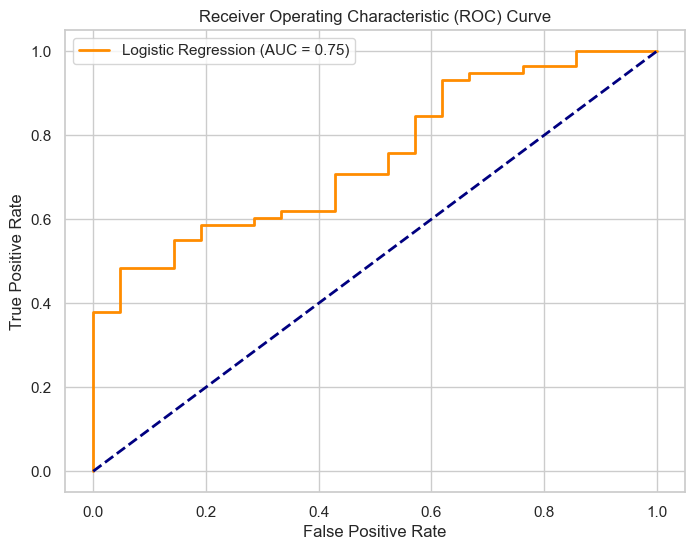

In [69]:
fpr, tpr, _ = roc_curve(y_test, model_lr.predict_proba(X_test_scaled)[:, 1])
roc_auc = auc(fpr, tpr)

#plotting roc curve
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="upper left")
plt.show()
 

Final Precision: 0.797
Final Recall: 0.948


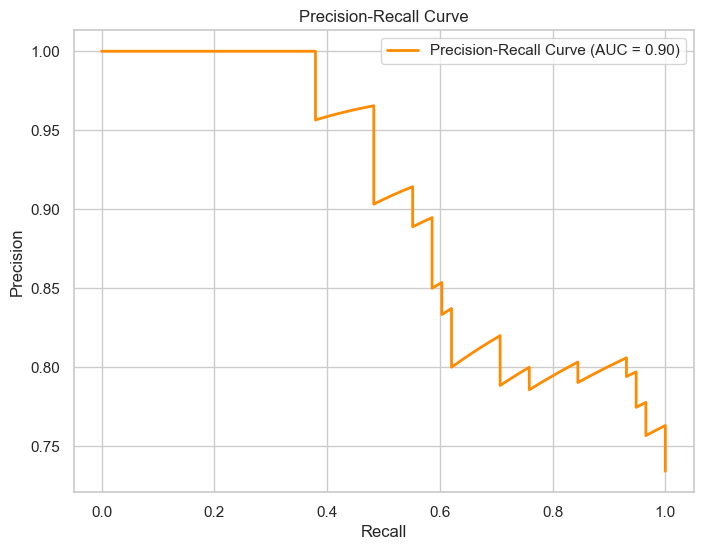

In [70]:
#precision recall curve:
y_probs = model_lr.predict_proba(X_test_scaled)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
auc_pr = auc(recall, precision)

final_precision = precision_score(y_test, model_lr.predict(X_test_scaled))
final_recall = recall_score(y_test, model_lr.predict(X_test_scaled))
print(f'Final Precision: {final_precision:.3f}')
print(f'Final Recall: {final_recall:.3f}')

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

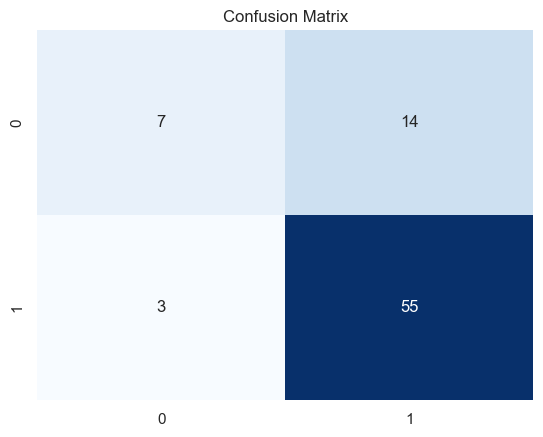

True Positive (TP): 55
True Negative (TN): 7
False Positive (FP): 14
False Negative (FN): 3


In [71]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)

#cm sections
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

print(f"True Positive (TP): {TP}")
print(f"True Negative (TN): {TN}")
print(f"False Positive (FP): {FP}")
print(f"False Negative (FN): {FN}")

Random Forest Classifier

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

random_forest = RandomForestClassifier(class_weight=None, max_depth=None, min_samples_leaf=1, min_samples_split=5,
                                       n_estimators=100, random_state=42)
#training
random_forest.fit(X_train_resampled, y_train_resampled)

#predictions
y_pred = random_forest.predict(X_test_scaled)


accuracy_rfc = accuracy = round(accuracy_score(y_test, y_pred) *100,2)
f1_rfc = round(f1_score(y_test, y_pred, average='weighted'),2)

report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}%")
print("\nRandom Forest Classification Report:\n", report)


Accuracy: 69.62%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.26      0.37        27
           1       0.71      0.92      0.80        52

    accuracy                           0.70        79
   macro avg       0.67      0.59      0.58        79
weighted avg       0.68      0.70      0.65        79



In [73]:
f1_rfc

0.65

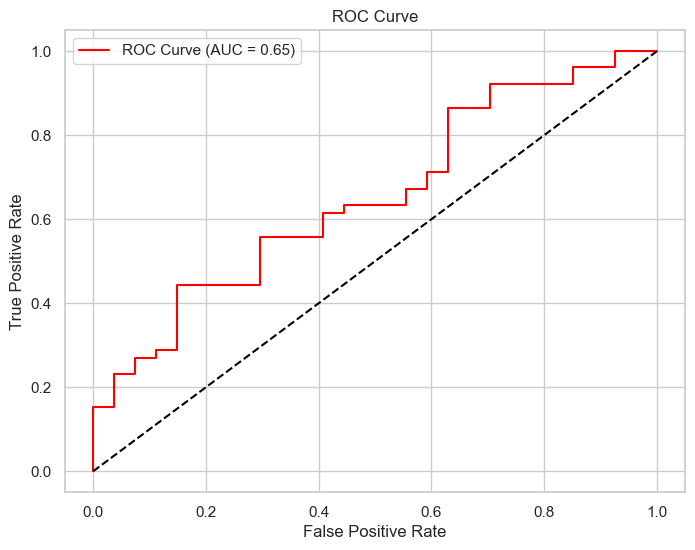

In [74]:
y_prob_rfc = random_forest.predict_proba(X_test_scaled)[:, 1]
y_pred_rfc = random_forest.predict(X_test_scaled)

fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
plt.figure(figsize=(8, 6))
plt.plot(fpr_rfc, tpr_rfc, color='red', label=f'ROC Curve (AUC = {roc_auc_rfc:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


Final Precision: 0.706
Final Recall: 0.923


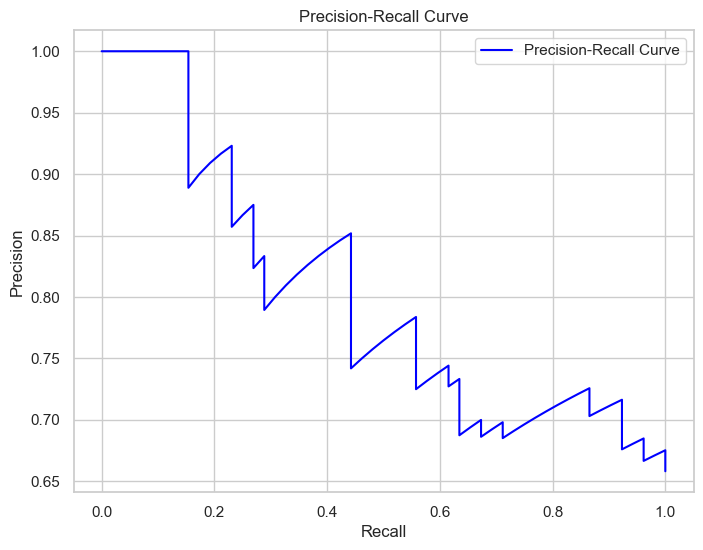

In [75]:
precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, y_prob_rfc)

final_precision_rfc = precision_score(y_test, random_forest.predict(X_test_scaled))
final_recall_rfc = recall_score(y_test, random_forest.predict(X_test_scaled))
print(f'Final Precision: {final_precision_rfc:.3f}')
print(f'Final Recall: {final_recall_rfc:.3f}')

plt.figure(figsize=(8, 6))
plt.plot(recall_rfc, precision_rfc, color='blue', label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



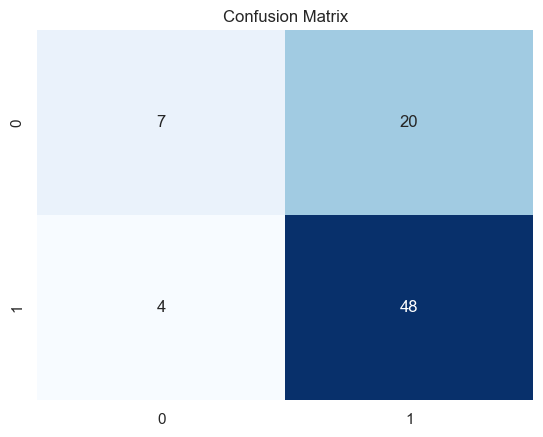

True Positive (TP): 48
True Negative (TN): 7
False Positive (FP): 20
False Negative (FN): 4


In [76]:
#confusion matrix
cm_rfc = confusion_matrix(y_test, y_pred)

#cm sections
TP_rfc = cm_rfc[1, 1]
TN_rfc = cm_rfc[0, 0]
FP_rfc = cm_rfc[0, 1]
FN_rfc = cm_rfc[1, 0]

sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

print(f"True Positive (TP): {TP_rfc}")
print(f"True Negative (TN): {TN_rfc}")
print(f"False Positive (FP): {FP_rfc}")
print(f"False Negative (FN): {FN_rfc}")

SVM classification

In [77]:
max_iteration = 10
random_seed = 42

max_f1_linear = 0
max_accuracy_linear = 0
best_model_state_linear = None

np.random.seed(random_seed)

for iteration in range(1, max_iteration + 1):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #Linear kernel
    pgrid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],'class_weight': [None, 'balanced']}
    svm_linear = SVC(kernel='linear', random_state=random_seed)
    
    grid_search_linear = GridSearchCV(svm_linear, pgrid_linear, cv=5, scoring='accuracy')
    grid_search_linear.fit(X_train_scaled, y_train)
    best_params_linear = grid_search_linear.best_params_
    
    svm_linear = SVC(kernel='linear', C=best_params_linear['C'], class_weight=best_params_linear['class_weight'], 
                     random_state=random_seed)
    
    svm_linear.fit(X_train_scaled, y_train)
    
    y_pred_linear = svm_linear.predict(X_test_scaled)
    
    #for evaulation metrics:
    f1_linear = f1_score(y_test, y_pred_linear, average='macro')
    accuracy_linear = accuracy_score(y_test, y_pred_linear) * 100

    if accuracy_linear > max_accuracy_linear and f1_linear > max_f1_linear:
        max_f1_linear = f1_linear
        max_accuracy_linear = accuracy_linear
        best_model_state_linear = (X_train_scaled, X_test_scaled, y_train, y_test, svm_linear)

In [78]:
#(RBF) kernel
max_f1_rbf = 0
max_accuracy_rbf = 0
best_model_state_rbf = None

for iteration in range(1, max_iteration + 1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=np.random.randint(1, 1000))
    
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    #RBF kernel
    pgrid_rbf = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [0.001, 0.01, 0.1, 1, 10]}
    svm_rbf = SVC(kernel='rbf', random_state=random_seed)
    
    grid_search_rbf = GridSearchCV(svm_rbf, pgrid_rbf, cv=10, scoring='accuracy')
    
    grid_search_rbf.fit(X_train_scaled, y_train)
    best_params_rbf = grid_search_rbf.best_params_
    
    svm_rbf = SVC(kernel='rbf', C=best_params_rbf['C'], gamma=best_params_rbf['gamma'], random_state=random_seed)
    svm_rbf.fit(X_train_scaled, y_train)
    
    y_pred_rbf = svm_rbf.predict(X_test_scaled)
    
    f1_rbf = f1_score(y_test, y_pred_rbf, average='macro')
    accuracy_rbf = accuracy_score(y_test, y_pred_rbf) * 100

    if accuracy_rbf > max_accuracy_rbf and f1_rbf > max_f1_rbf:
        max_f1_rbf = f1_rbf
        max_accuracy_rbf = accuracy_rbf
        best_model_state_rbf = (X_train_scaled, X_test_scaled, y_train, y_test, svm_rbf)


In [79]:
X_train_scaled_linear, X_test_scaled_linear, y_train_linear, y_test_linear, model_linear = best_model_state_linear

y_train_pred_linear = model_linear.predict(X_train_scaled_linear)
y_test_pred_linear = model_linear.predict(X_test_scaled_linear)
y_pred_linear = model_linear.predict(X_test_scaled_linear)


X_train_scaled_rbf, X_test_scaled_rbf, y_train_rbf, y_test_rbf, model_rbf = best_model_state_rbf

y_train_pred_rbf = model_rbf.predict(X_train_scaled_rbf)
y_test_pred_rbf = model_rbf.predict(X_test_scaled_rbf)
y_pred_rbf = model_rbf.predict(X_test_scaled_rbf)

print("Linear Kernel:")
print(f"Train Accuracy: {accuracy_score(y_train_linear, y_train_pred_linear) * 100:.2f} %")
print(f"Test Accuracy: {accuracy_score(y_test_linear, y_test_pred_linear) * 100:.2f} %")
print(f"Final Model Accuracy: {accuracy_score(y_test_linear, y_pred_linear) * 100:.2f} %")
print(f"F1 Score: {f1_score(y_test_linear, y_test_pred_linear, average='weighted'):.2f} %")

print("\nRBF Kernel:")
print(f"Train Accuracy: {accuracy_score(y_train_rbf, y_train_pred_rbf) * 100:.2f} %")
print(f"Test Accuracy: {accuracy_score(y_test_rbf, y_test_pred_rbf) * 100:.2f} %")
print(f"Final Model Accuracy: {accuracy_score(y_test_rbf, y_pred_rbf) * 100:.2f} %")
print(f"F1 Score: {f1_score(y_test_rbf, y_test_pred_rbf, average='weighted'):.2f} %")

accuracy_linear =  round(accuracy_score(y_test_linear, y_test_pred_linear) * 100, 2)
accuracy_rbf = round(accuracy_score(y_test_rbf, y_pred_rbf)* 100,2)
f1_linear = round(f1_score(y_test_linear, y_test_pred_linear, average='weighted'), 2) 
f1_rbf = round(f1_score(y_test_rbf, y_test_pred_rbf, average='weighted'), 2)

Linear Kernel:
Train Accuracy: 73.73 %
Test Accuracy: 79.75 %
Final Model Accuracy: 79.75 %
F1 Score: 0.78 %

RBF Kernel:
Train Accuracy: 71.52 %
Test Accuracy: 77.22 %
Final Model Accuracy: 77.22 %
F1 Score: 0.77 %


In [80]:
report_linear = classification_report(y_test_linear, y_test_pred_linear, target_names=["0", "1"])
print(f"Linear Kernel Accuracy: {accuracy_score(y_test_linear, y_pred_linear) * 100:.2f} %")
print("\nClassification Report (Linear Kernel):\n", report_linear)

report_rbf = classification_report(y_test_rbf, y_test_pred_rbf, target_names=["0", "1"])
print(f"RBF kernel Accuracy: {accuracy_score(y_test_rbf, y_pred_rbf) * 100:.2f} %")
print("\nClassification Report (RBF Kernel):\n", report_rbf)


Linear Kernel Accuracy: 79.75 %

Classification Report (Linear Kernel):
               precision    recall  f1-score   support

           0       0.71      0.45      0.56        22
           1       0.82      0.93      0.87        57

    accuracy                           0.80        79
   macro avg       0.76      0.69      0.71        79
weighted avg       0.79      0.80      0.78        79

RBF kernel Accuracy: 77.22 %

Classification Report (RBF Kernel):
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        19
           1       0.84      0.87      0.85        60

    accuracy                           0.77        79
   macro avg       0.68      0.67      0.68        79
weighted avg       0.76      0.77      0.77        79



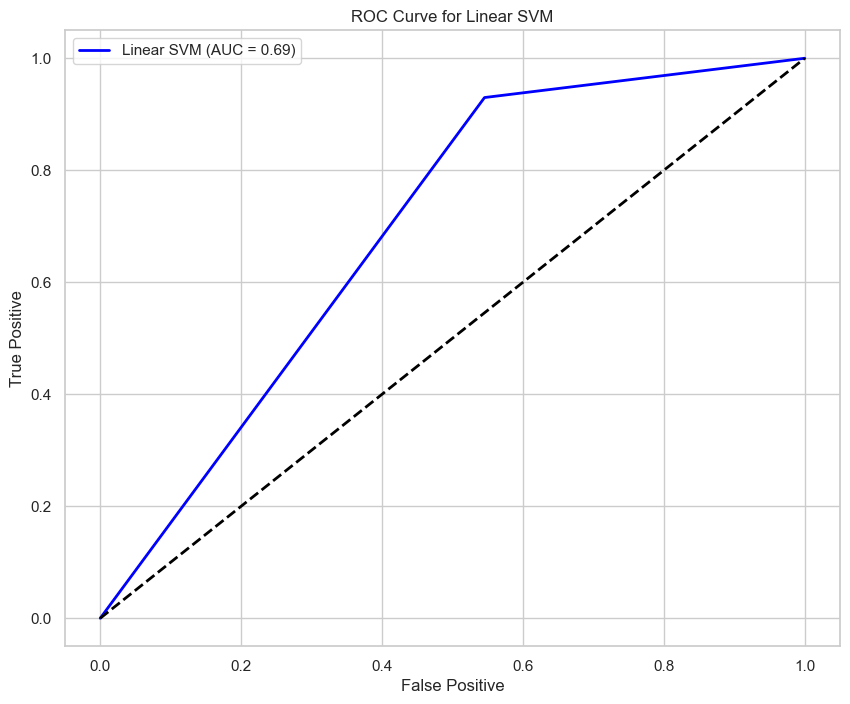

In [81]:
fpr_linear, tpr_linear, _ = roc_curve(y_test_linear, y_pred_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)

fpr_rbf, tpr_rbf, _ = roc_curve(y_test_rbf, y_pred_rbf)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

plt.figure(figsize=(10, 8))

#linear roc
plt.plot(fpr_linear, tpr_linear, color='blue', lw=2, label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC Curve for Linear SVM')
plt.legend()
plt.show()

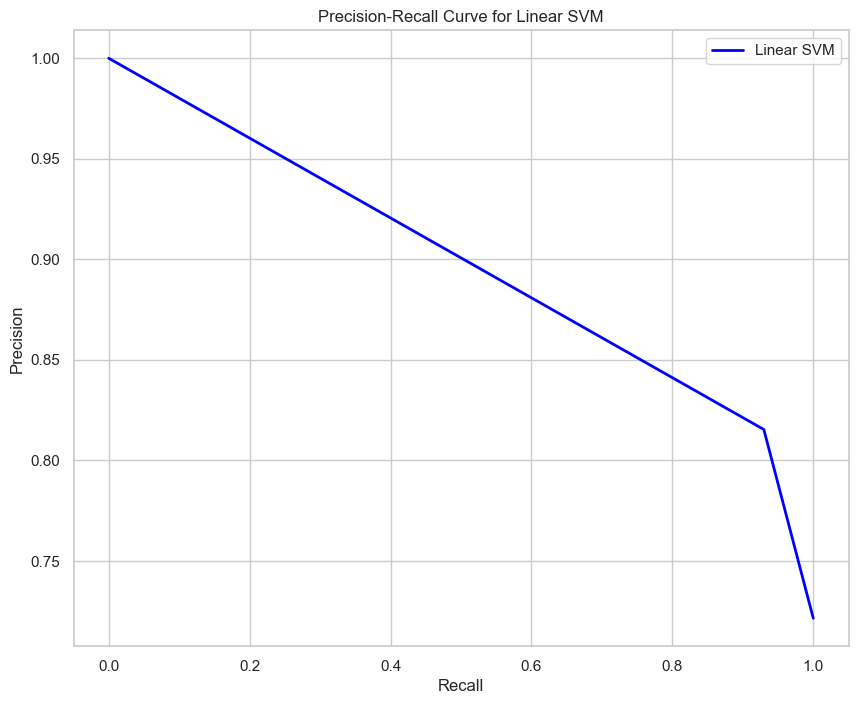

In [82]:
precision_linear, recall_linear, _ = precision_recall_curve(y_test_linear, y_pred_linear)

precision_rbf, recall_rbf, _ = precision_recall_curve(y_test_rbf, y_pred_rbf)

#Precision-Recall curves
plt.figure(figsize=(10, 8))

#linear Precision-Recall curve
plt.plot(recall_linear, precision_linear, color='blue', lw=2, label='Linear SVM')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Linear SVM')
plt.legend()
plt.show()

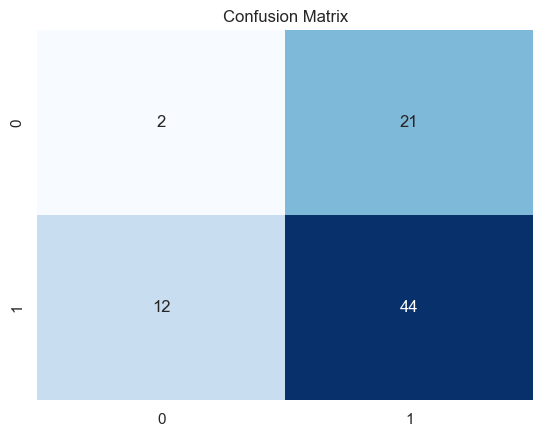

True Positive (TP): 44
True Negative (TN): 2
False Positive (FP): 21
False Negative (FN): 12


In [83]:
#confusion matrix
cm_svm= confusion_matrix(y_test, y_pred_linear)

#cm sections
TP_svm = cm_svm[1, 1]
TN_svm = cm_svm[0, 0]
FP_svm = cm_svm[0, 1]
FN_svm = cm_svm[1, 0]

sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.show()

print(f"True Positive (TP): {TP_svm}")
print(f"True Negative (TN): {TN_svm}")
print(f"False Positive (FP): {FP_svm}")
print(f"False Negative (FN): {FN_svm}")

In [84]:
#comparison table
comp_table_data = [
    ["Logistic Regression Model", accuracy_lr, f1_lr],
    ["Random Forest Model", accuracy_rfc, f1_rfc],
    ["SVM Linear Model", accuracy_linear, f1_linear],
    ["SVM RBF Model", accuracy_rbf, f1_rbf],
]

headers = ["Model", "Accuracy", "F1 Score"]

print(tabulate(comp_table_data, headers=headers, tablefmt="grid"))

+---------------------------+------------+------------+
| Model                     |   Accuracy |   F1 Score |
+===========================+============+============+
| Logistic Regression Model |      78.48 |       0.76 |
+---------------------------+------------+------------+
| Random Forest Model       |      69.62 |       0.65 |
+---------------------------+------------+------------+
| SVM Linear Model          |      79.75 |       0.78 |
+---------------------------+------------+------------+
| SVM RBF Model             |      77.22 |       0.77 |
+---------------------------+------------+------------+


In [85]:
#GOOD Factors -> Dominating

# sample_data_lr = {
#     'age': 16,
#     'Medu': 3,
#     'Fedu': 2,
#     'Mjob': 'at_home',
#     'Fjob': 'others',
#     'famrel': 4,
#     'freetime': 3,
#     'goout': 2,
#     'Dalc': 1,
#     'Walc': 2,
#     'health': 5,
#     'absences': 4,
# }

In [86]:
#BAD Factors -> Dominating

# sample_data_lr_1 = {
#     'age': 18,  #increasing the age
#     'Medu': 1,  #decreasing mother's education level
#     'Fedu': 1,  #decreasing father's education level
#     'Mjob': 'services',  #changing mother's job
#     'Fjob': 'at_home',  #changing father's job
#     'famrel': 2,  #decreasing family relationship score
#     'freetime': 5,  #increasing free time
#     'goout': 5,  #increasing going out frequency
#     'Dalc': 5,  #increasing weekday alcohol consumption
#     'Walc': 5,  #increasing weekend alcohol consumption
#     'health': 1,  #decreasing health status
#     'absences': 20,  #increasing absences
# }

In [87]:
def predict_student_outcome_svm():
    sample_data_svm = {
        'age': int(input('Age: ')),
        'Medu': int(input('Mother\'s education level (numeric): ')),
        'Fedu': int(input('Father\'s education level (numeric): ')),
        'Mjob': input('Mother\'s job: '),
        'Fjob': input('Father\'s job: '),
        'famrel': int(input('Family relationship score (numeric): ')),
        'freetime': int(input('Free time score (numeric): ')),
        'goout': int(input('Going out frequency score (numeric): ')),
        'Dalc': int(input('Weekday alcohol consumption score (numeric): ')),
        'Walc': int(input('Weekend alcohol consumption score (numeric): ')),
        'health': int(input('Health status score (numeric): ')),
        'absences': int(input('Number of absences: ')),
    }

    sample_svm_df = pd.DataFrame([sample_data_svm])

    #encoding the data using the one-hot function 
    sample_svm_df_encoded = ohe_data(sample_svm_df)

    #arranging columns according to the columns used during training
    missing_cols = set(X.columns) - set(sample_svm_df_encoded.columns)
    for col in missing_cols:
        sample_svm_df_encoded[col] = 0  
    sample_svm_df_encoded = sample_svm_df_encoded[X.columns]

    #scaling the data
    sample_data_svm_scaled = scaler.transform(sample_svm_df_encoded)

    #predicting based on my best model
    sample_svm_prediction = svm_linear.predict(sample_data_svm_scaled)

    #providing labels for pass and fail
    pf_labels_svm = {1: 'Pass', 0: 'Fail'}
    svm_final_outcome_predicted = [pf_labels_svm[pred] for pred in sample_svm_prediction]

    print("\n\n\n Predicted Outcome of the model is :", svm_final_outcome_predicted[0])


In [88]:
predict_student_outcome_svm()

Age: 21
Mother's education level (numeric): 8
Father's education level (numeric): 8
Mother's job: teacher
Father's job: services
Family relationship score (numeric): 8
Free time score (numeric): 2
Going out frequency score (numeric): 2
Weekday alcohol consumption score (numeric): 1
Weekend alcohol consumption score (numeric): 2
Health status score (numeric): 7
Number of absences: 3



 Predicted Outcome of the model is : Pass
